In [1]:
from solution2.func import *
from solution2.mfea import *
from solution2.evolution import *
import json

### load config

In [2]:
# "data/ga-dem10_r25_1_0.json", "data/ga-dem6_r25_1_40.json", 
# "data/ga-dem10_r50_1_0.json", "data/ga-dem6_r50_1_40.json"
paths = ["data/ga-dem10_r25_1_0.json", "data/ga-dem6_r25_1_40.json", "data/ga-dem2_r50_1_0.json"]

pop_configs = []
for path in paths:
    config = {}
    f = open(path)
    data = json.load(f)
    f.close()

    config['n_relay'] = data['num_of_relays']
    config['n_sensor'] = data['num_of_sensors']
    config['radius'] = data['radius']

    relays = data['relays']
    sensors = data['sensors']
    center = data['center']
    radius = data['radius']

    list_node = [center] + relays + sensors
    list_coordinates = []
    for node in list_node:
        list_coordinates.append([node['x'], node['y'], node['z']])
    list_coordinates = np.array(list_coordinates)
    config['list_coordinates'] = list_coordinates
    pop_configs.append(config)

### Population

In [3]:
# khoi tao population
max_n_relays = max(config['n_relay'] for config in pop_configs)
max_n_sensors = max(config['n_sensor'] for config in pop_configs)

# khoi tao gene dau tien
genes_init = np.concatenate([np.zeros(max_n_relays+1), np.random.randint(1, max_n_relays+1, max_n_sensors)])
pop = Population(max_n_sensors, max_n_relays, [Individual(genes_init)], pop_configs)
pop.random_indivs(500)
pop.reset_param()

In [4]:
pop.get_fittest()[0].get_cost(), pop.get_fittest()[1].get_cost(), pop.get_fittest()[2].get_cost()

(0.0006466455750176169, 0.0009737040880861951, 0.0008319252962845776)

In [9]:
# arr = [[], [], []]
for i in range(100):
    evolution(pop, max_n_relays, 0.6, 1, 200)
    for j in range(3):
        arr[j].append([pop.get_fittest()[j].get_cost(), encode(pop.get_fittest()[j].genes, pop_configs[j])])
    print([x.get_cost() for x in pop.get_fittest()])

[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.0004268854389753577, 0.0005176853752400404, 0.0004795561652609545]
[0.00042688543897535

C:\ProgramData\Anaconda3\envs\MultifactorialEvolution\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\MultifactorialEvolution\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\ProgramData\Anaconda3\envs\MultifactorialEvolution\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

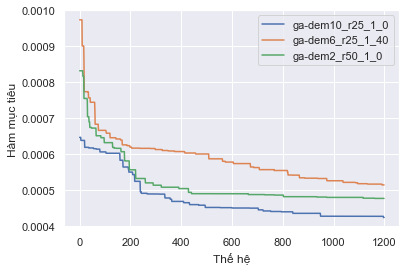

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

sns.lineplot(list(range(1200)), [arr[0][x][0] for x in range(1200)])
sns.lineplot(list(range(1200)), [arr[1][x][0] for x in range(1200)])
sns.lineplot(list(range(1200)), [arr[2][x][0] for x in range(1200)])

plt.xlabel("Thế hệ")


plt.ylabel("Hàm mục tiêu")
plt.legend(['ga-dem10_r25_1_0', 'ga-dem6_r25_1_40', 'ga-dem2_r50_1_0'])

plt.show()

In [35]:
import pandas as pd
pd.DataFrame(arr[0], columns=['cost', 'genes']).to_csv("results/mfea/ga-dem10_r25_1_0.csv", index=False)
pd.DataFrame(arr[1], columns=['cost', 'genes']).to_csv("results/mfea/ga-dem6_r25_1_40.csv", index=False)
pd.DataFrame(arr[2], columns=['cost', 'genes']).to_csv("results/mfea/ga-dem2_r50_1_0.csv", index=False)

### Visualine

### ga-dem2_r50_1_0.json

In [118]:
ga2 = pd.read_csv("results/ga/ga-dem2_r50_1_0.csv", header=0)['cost']
mfea = pd.read_csv("results/mfea/ga-dem2_r50_1_0.csv", header=0)['cost']